<a href="https://colab.research.google.com/github/impeccable16/MOJA-handwriting-recognition/blob/main/neural-network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import sklearn
import pandas as pd

In [ ]:
from sklearn.datasets import make_classification
torch.manual_seed(123) #generate random number

In [ ]:
df = pd.read_csv('/content/star_classification.csv')
print(df)


             obj_ID       alpha      delta         u         g         r  \
0      1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
56317  1.237659e+18  215.472095  55.583002  21.20926  20.21335  19.91495   
56318  1.237665e+18  172.410880  35.514648  15.79500  14.20551  13.47841   
56319  1.237667e+18  166.191736  26.100734  18.97650  17.84026  17.25278   
56320  1.237649e+18  230.893203   0.267428  25.22322  22.69935  20.91212   
56321  1.237649e+18  145.016480   0.248985  19.67851  18.39820  17.69079   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0      

In [ ]:
df.head

<bound method NDFrame.head of              obj_ID       alpha      delta         u         g         r  \
0      1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
56317  1.237659e+18  215.472095  55.583002  21.20926  20.21335  19.91495   
56318  1.237665e+18  172.410880  35.514648  15.79500  14.20551  13.47841   
56319  1.237667e+18  166.191736  26.100734  18.97650  17.84026  17.25278   
56320  1.237649e+18  230.893203   0.267428  25.22322  22.69935  20.91212   
56321  1.237649e+18  145.016480   0.248985  19.67851  18.39820  17.69079   

              i         z  run_ID  rerun_ID  cam_col  fie

In [ ]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,5.632200e+04,56322.000000,56322.000000,56322.000000,56322.000000,56322.000000,56322.000000,56322.000000,56322.000000,56322.0,56321.000000,56321.000000,5.632100e+04,56321.000000,56321.000000,56321.000000,56321.000000
mean,1.237665e+18,179.268285,23.691691,22.069973,20.622798,19.643790,19.087350,18.775147,4444.163808,301.0,3.587063,193.042932,5.716614e+18,0.574819,5077.262282,55548.838195,452.706113
std,8.462639e+12,95.833658,19.736554,2.239398,2.027254,1.847772,1.753500,1.765400,1970.378336,0.0,1.580102,156.806471,3.334196e+18,0.733070,2961.345751,1817.754038,270.218825
min,1.237646e+18,0.005528,-16.847136,12.262400,10.511390,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995793e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237658e+18,127.457360,4.009991,20.348063,18.971563,18.140922,17.739838,17.467675,3015.000000,301.0,2.000000,83.000000,2.777727e+18,0.050472,2467.000000,54178.000000,229.000000
50%,1.237663e+18,179.802816,22.338558,22.165280,21.080250,20.112755,19.398635,19.003520,4192.000000,301.0,4.000000,153.000000,5.459580e+18,0.417515,4849.000000,55852.000000,439.000000
75%,1.237669e+18,235.043602,39.574622,23.670503,22.108950,21.032893,20.396413,19.924903,5362.000000,301.0,5.000000,248.000000,8.253048e+18,0.703568,7330.000000,56746.000000,644.000000
max,1.237681e+18,359.999810,83.000519,30.660390,31.602240,29.571860,30.250090,29.383740,8162.000000,301.0,6.000000,980.000000,1.412693e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
df.shape

(56322, 18)

In [ ]:

X,y=make_classification(n_samples=1000,n_features=4 ,n_classes=2)


X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)

In [ ]:

torch.manual_seed(20)
suffle_idx=torch.randperm(y.size(0),dtype=torch.long)
X,y=X[suffle_idx],y[suffle_idx]
suffle_idx[:20]

tensor([531, 470, 843,  18, 220, 430, 155, 160, 691, 626,  47, 936, 364, 990,
         86,  81, 306, 150, 503, 984])

In [ ]:

train_size=int(suffle_idx.size(0)*0.7)
train_idx= suffle_idx[:train_size]
test_idx=suffle_idx[train_size:]
X_train,y_train=X[train_idx],y[train_idx]
X_test,y_test=X[test_idx],y[test_idx]

In [ ]:
X_train.shape

torch.Size([700, 4])

In [ ]:
X_test.shape

torch.Size([300, 4])

In [ ]:


mean,std_dev=X_train.mean(dim=0) ,X_train.std(dim=0)
X_train=(X_train-mean)/std_dev
X_test=(X_test-mean)/std_dev

In [ ]:
import torch.nn as nn
from torch.autograd import grad

In [ ]:
class NN():
  def __init__(self,n_features):
    self.n_features=n_features
    self.weight=torch.zeros(size=(n_features,1),dtype=torch.float,requires_grad=True)
    self.bias=torch.zeros(1,dtype=torch.float,requires_grad=True)
  

  def forward(self,x):
    output=torch.add(torch.mm(x,self.weight),self.bias)
    return output.view(-1)

def loss_fn(yhat,y):
  return torch.mean((yhat-y)**2)


In [ ]:
def train(model,x,y,n_epoch=15,lr=0.001,seed=24,bsz=50):

  cost=[]
  torch.manual_seed(seed)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:

      ###1. Compute the output
      yhat=model.forward(x[idx])

      ###2. Compute the Error
      loss=loss_fn(yhat,y[idx])

      ###3. Compute the gradient
      grad_w=grad(loss,model.weight,retain_graph=True)[0]
      grad_b=grad(loss,model.bias)[0]

      ###4. Update Model Parameters
      model.weight=model.weight-lr*grad_w
      model.bias=model.bias-lr*grad_b

    ###5. Log and print the loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost

In [ ]:
model=NN(X_train.size(1))
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.47020
Epoc:   2 | MSE  0.44076
Epoc:   3 | MSE  0.41417
Epoc:   4 | MSE  0.39011
Epoc:   5 | MSE  0.36826
Epoc:   6 | MSE  0.34839
Epoc:   7 | MSE  0.33027
Epoc:   8 | MSE  0.31373
Epoc:   9 | MSE  0.29857
Epoc:  10 | MSE  0.28467
Epoc:  11 | MSE  0.27189
Epoc:  12 | MSE  0.26013
Epoc:  13 | MSE  0.24926
Epoc:  14 | MSE  0.23922
Epoc:  15 | MSE  0.22994
Epoc:  16 | MSE  0.22132
Epoc:  17 | MSE  0.21331
Epoc:  18 | MSE  0.20588
Epoc:  19 | MSE  0.19896
Epoc:  20 | MSE  0.19250
Epoc:  21 | MSE  0.18648
Epoc:  22 | MSE  0.18087
Epoc:  23 | MSE  0.17561
Epoc:  24 | MSE  0.17070
Epoc:  25 | MSE  0.16610
Epoc:  26 | MSE  0.16179
Epoc:  27 | MSE  0.15775
Epoc:  28 | MSE  0.15396
Epoc:  29 | MSE  0.15040
Epoc:  30 | MSE  0.14706
Epoc:  31 | MSE  0.14392
Epoc:  32 | MSE  0.14097
Epoc:  33 | MSE  0.13820
Epoc:  34 | MSE  0.13559
Epoc:  35 | MSE  0.13313
Epoc:  36 | MSE  0.13082
Epoc:  37 | MSE  0.12864
Epoc:  38 | MSE  0.12659
Epoc:  39 | MSE  0.12466
Epoc:  40 | MSE  0.12284


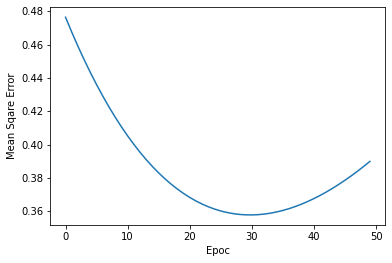

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)),cost)
plt.ylabel('Mean Sqare Error')
plt.xlabel('Epoc')
plt.show()

In [ ]:
ones=torch.ones(y_train.size())
zero=torch.zeros(y_train.size())
train_pred=model.forward(X_train)
train_acc=torch.mean((  
    torch.where(train_pred > 0.5,
                ones,zero).int()==y_train).float())


ones=torch.ones(y_test.size())
zeros=torch.zeros(y_test.size())
test_pred=model.forward(X_test)
test_acc=torch.mean((torch.where(test_pred> 0.5,ones,zeros).int()==y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Testing Accuracy: %.2f' % (test_acc*100))

Training Accuracy: 87.86
Testing Accuracy: 89.33


In [ ]:
import torch
import sklearn
import torch.nn.functional as F

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
### Create The dataset
X,y=make_classification(n_samples=1000,n_classes=2,n_features=5)

### Normalize the Data
scaler=StandardScaler()
X=scaler.fit_transform(X)

### Array to Tensor
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=21)
print(X_train.shape)
print(X_test.shape)

torch.Size([700, 5])
torch.Size([300, 5])


In [ ]:
class NNpt(nn.Module):
  def __init__(self,n_features):
    super(NNpt,self).__init__()
    self.linear=nn.Linear(n_features,1)

    self.linear.weight.detach().zero_()
    self.linear.bias.detach().zero_()


  def forward(self,x):
    out=self.linear(x)
    return out.view(-1)

In [ ]:
def train(model,x,y,n_epoch=15,lr=0.001,seed=24,bsz=60):

  cost=[]
  torch.manual_seed(seed)
   ### Optimizer
  optimizer=torch.optim.SGD(model.parameters(),lr=lr)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:
      ###1. Compute the Output
      yhat=model.forward(x[idx])

      ###2. Compute the Loss
      loss=torch.nn.functional.mse_loss(yhat,y[idx])

      ###3. Compute the Gradients
      optimizer.zero_grad()
      loss.backward()

      ###4. Update the Model Parameters
      optimizer.step()
      #model.weight=model.weight-lr*grad_w
      #model.bias=model.bias-lr*grad_b

    ###5. Log and print the Loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost


In [ ]:
n_feature=X_train.size(1)
model=NNpt(n_features=n_feature)

In [ ]:
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.10266
Epoc:   2 | MSE  0.10177
Epoc:   3 | MSE  0.10093
Epoc:   4 | MSE  0.10012
Epoc:   5 | MSE  0.09935
Epoc:   6 | MSE  0.09862
Epoc:   7 | MSE  0.09792
Epoc:   8 | MSE  0.09726
Epoc:   9 | MSE  0.09664
Epoc:  10 | MSE  0.09604
Epoc:  11 | MSE  0.09547
Epoc:  12 | MSE  0.09494
Epoc:  13 | MSE  0.09443
Epoc:  14 | MSE  0.09394
Epoc:  15 | MSE  0.09348
Epoc:  16 | MSE  0.09303
Epoc:  17 | MSE  0.09262
Epoc:  18 | MSE  0.09223
Epoc:  19 | MSE  0.09186
Epoc:  20 | MSE  0.09150
Epoc:  21 | MSE  0.09117
Epoc:  22 | MSE  0.09084
Epoc:  23 | MSE  0.09054
Epoc:  24 | MSE  0.09026
Epoc:  25 | MSE  0.08999
Epoc:  26 | MSE  0.08973
Epoc:  27 | MSE  0.08947
Epoc:  28 | MSE  0.08924
Epoc:  29 | MSE  0.08901
Epoc:  30 | MSE  0.08879
Epoc:  31 | MSE  0.08859
Epoc:  32 | MSE  0.08839
Epoc:  33 | MSE  0.08821
Epoc:  34 | MSE  0.08803
Epoc:  35 | MSE  0.08787
Epoc:  36 | MSE  0.08771
Epoc:  37 | MSE  0.08755
Epoc:  38 | MSE  0.08741
Epoc:  39 | MSE  0.08727
Epoc:  40 | MSE  0.08714


[]

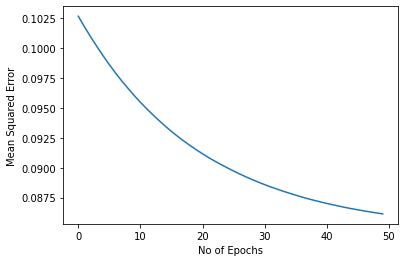

In [ ]:
plt.plot(range(len(cost)),cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()

In [ ]:
ones=torch.ones(y_train.size(0))
zero=torch.zeros(y_train.size(0))
train_pred=model.forward(X_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y_train).float())
#print(train_acc)

ones=torch.ones(y_test.size(0))
zero=torch.zeros(y_test.size(0))
test_pred=model.forward(X_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y_test).float())
print('Training Accuracy : %.2f' % train_acc)
print('Testing Accuracy: %.2f' % test_acc)

Training Accuracy : 0.94
Testing Accuracy: 0.95


In [ ]:
def train(model,x,y,n_epoch=15,lr=0.001,seed=24,bsz=50):

  cost=[]
  torch.manual_seed(seed)
   ### Optimizer
  optimizer=torch.optim.SGD(model.parameters(),lr=lr)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:
      ###1. Compute the Output
      yhat=model.forward(x[idx])

      ###2. Compute the Loss
      loss=torch.nn.functional.binary_cross_entropy(torch.sigmoid(yhat),y[idx])

      ###3. Compute the Gradients
      optimizer.zero_grad()
      loss.backward()

      ###4. Update the Model Parameters
      optimizer.step()
      #model.weight=model.weight-lr*grad_w
      #model.bias=model.bias-lr*grad_b

    ###5. Log and print the Loss
    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost


In [ ]:
n_feature=X_train.size(1)
model=NNpt(n_features=n_feature)

In [ ]:
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.47635
Epoc:   2 | MSE  0.46743
Epoc:   3 | MSE  0.45894
Epoc:   4 | MSE  0.45086
Epoc:   5 | MSE  0.44320
Epoc:   6 | MSE  0.43593
Epoc:   7 | MSE  0.42905
Epoc:   8 | MSE  0.42254
Epoc:   9 | MSE  0.41641
Epoc:  10 | MSE  0.41063
Epoc:  11 | MSE  0.40521
Epoc:  12 | MSE  0.40012
Epoc:  13 | MSE  0.39537
Epoc:  14 | MSE  0.39094
Epoc:  15 | MSE  0.38683
Epoc:  16 | MSE  0.38302
Epoc:  17 | MSE  0.37951
Epoc:  18 | MSE  0.37630
Epoc:  19 | MSE  0.37337
Epoc:  20 | MSE  0.37071
Epoc:  21 | MSE  0.36833
Epoc:  22 | MSE  0.36621
Epoc:  23 | MSE  0.36434
Epoc:  24 | MSE  0.36272
Epoc:  25 | MSE  0.36135
Epoc:  26 | MSE  0.36021
Epoc:  27 | MSE  0.35930
Epoc:  28 | MSE  0.35862
Epoc:  29 | MSE  0.35815
Epoc:  30 | MSE  0.35790
Epoc:  31 | MSE  0.35785
Epoc:  32 | MSE  0.35801
Epoc:  33 | MSE  0.35836
Epoc:  34 | MSE  0.35891
Epoc:  35 | MSE  0.35964
Epoc:  36 | MSE  0.36055
Epoc:  37 | MSE  0.36164
Epoc:  38 | MSE  0.36290
Epoc:  39 | MSE  0.36433
Epoc:  40 | MSE  0.36592


[]

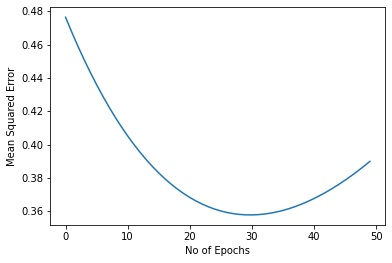

In [ ]:
plt.plot(range(len(cost)),cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()

In [ ]:
ones=torch.ones(y_train.size(0))
zero=torch.zeros(y_train.size(0))
train_pred=model.forward(X_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y_train).float())
#print(train_acc)

ones=torch.ones(y_test.size(0))
zero=torch.zeros(y_test.size(0))
test_pred=model.forward(X_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y_test).float())
print('Training Accuracy : %.2f' % train_acc)
print('Testing Accuracy: %.2f' % test_acc)

Training Accuracy : 0.71
Testing Accuracy: 0.64
